# Funnel Analysis

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

## 1.Data load
- 문서 앱내 사용시 발생하는 클라이언 로그 데이터 
(after parsed)
- 서버로그와 달리, 유저의 행동이 발생할 경우 로그 수집 (유저 행동 패턴 파악에 용이)
    - 클라이언트(앱) 로그
    - 서버 로그

In [3]:
%cd C:\dev\github\analysis practice\로그 데이터 분석\

C:\dev\github\analysis practice\로그 데이터 분석


In [4]:
df = pd.read_csv('datas/tutorial_02/df_funnel.csv',index_col=0)
#index_col = 0 : unnamed:0 컬럼 제거

### 1.2 Columns Info.
- actiontype: 문서 이용시 행동(OPEN, CLOSE, SAVE,,)
- ismydoc: 내문서 해당 여부(중요x)
- ext: 문서 확장자
- sessionid: 유저 식별자
- documentposition: 문서 이용시 위치 정보(CLOUD, OTHERAPP)
- datetime: Timestamp
- screen: 앱내 화면 이름

In [5]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


In [6]:
# key info => data entires, missing values, type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   actiontype        301861 non-null  object
 1   ismydoc           301861 non-null  object
 2   ext               301861 non-null  object
 3   sessionid         301861 non-null  object
 4   documentposition  301861 non-null  object
 5   datetime          301861 non-null  object
 6   screen            301861 non-null  object
dtypes: object(7)
memory usage: 18.4+ MB


data entries : 301861 / missing values : None / type : all object
> change datetime type

## 2. Preprocessing
- 데이터 타입 변환
- 데이터 값 변경
- 결측치 처리
- 신규 session id 부여
- 대소문자 처리

### 2.1 날짜를 pandas datetime 형태로 변환하기
[Reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

```python
pandas.to_datetime()
```

case 1. data type is string

In [7]:
#size() : NaN 포함 , series type 반환
#count() : NaN 제외 , dataframe 반환
df.groupby('datetime').size().head(15)


datetime
2016.7.1     11836
2016.7.10     6750
2016.7.11    10075
2016.7.12    12340
2016.7.13    12159
2016.7.14    11721
2016.7.15    11057
2016.7.16     8513
2016.7.17     6906
2016.7.18     9987
2016.7.19    11872
2016.7.2      8884
2016.7.20    11912
2016.7.21    11599
2016.7.22    11250
dtype: int64

In [8]:
str_date = ['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05'] # string type
str_date

['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05']

In [9]:
#str -> datetime type -> pd.series
pd.Series(pd.to_datetime(str_date,format='mixed')) 

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
dtype: datetime64[ns]

case 2. data type is timestamp 

In [10]:
ts_date = [1349720105, 1349806505, 1349892905, 1349979305, 1350065705]
ts_date

[1349720105, 1349806505, 1349892905, 1349979305, 1350065705]

In [11]:
pd.Series(pd.to_datetime(ts_date,unit='s')).dt.date

0    2012-10-08
1    2012-10-09
2    2012-10-10
3    2012-10-11
4    2012-10-12
dtype: object

case 3. change type only

In [12]:
df.datetime.info() #object -> str

<class 'pandas.core.series.Series'>
Index: 301861 entries, 0 to 301860
Series name: datetime
Non-Null Count   Dtype 
--------------   ----- 
301861 non-null  object
dtypes: object(1)
memory usage: 4.6+ MB


In [13]:
#option1. string to datetime 
df['datetime'].astype('datetime64[ns]').head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [14]:
# option2.
pd.to_datetime(df['datetime']).head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [15]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [16]:
df.datetime.info()

<class 'pandas.core.series.Series'>
Index: 301861 entries, 0 to 301860
Series name: datetime
Non-Null Count   Dtype         
--------------   -----         
301861 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.6 MB


In [17]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main


### 2.2 Missing value 확인

In [18]:
df.isnull().sum()

actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
dtype: int64

### 2.3 결측치 처리

- **Drop**
    - 경우에 따라 결측치 처리 방법이 달라진다.
    - 샘플수가 많다면 missing values 를 포함하는 행을 모두 삭제하는 것이 가능하다

```python
# 결측치가 하나라도 있으면 
df.dropna()

# 모든 값이 Null일 경우만
df.dropna(how='all')

# 결측치가 하나 이상 있는 Case만 선택
df[df.isnull().any(axis=1)]
```

- **Imputation**
    - 만약 샘플수가 충분하지 않을 경우, Pandas의 fillna() 명령어로 Null 값을 채우는 것이 가능하다. 
    - 연속형인 경우 Mean이나 Median을 이용하고 명목형인 경우 Mode(최빈치)나 예측 모형을 통해 Null 값을 대체할 수 있다.

```python
# Null 값을 median으로 대체하는 코드 예제
df.fillna(df.mean()) 
```

In [19]:
#날짜별 screen 사용자 이용 현황
df_by_screen = df.groupby(['datetime','screen'])['sessionid'].nunique().unstack()
df_by_screen[:10]

#.unstack() : 가장 안쪽에 있는 row를 column으로 피벗시킨 dataframe 반환 

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0
2016-07-06,138.0,145.0,3256.0,293.0,855.0,1.0,30.0
2016-07-07,110.0,117.0,3150.0,266.0,807.0,NaN,18.0
2016-07-08,117.0,148.0,3208.0,273.0,865.0,2.0,20.0
2016-07-09,102.0,138.0,2381.0,229.0,748.0,2.0,23.0


In [20]:
df_by_screen.isnull().sum()

screen
InProduct_Mob    0
InProduct_Web    0
Main             0
Per_Dir          0
Pub_Dir          0
Purchase_done    6
Purchase_page    0
dtype: int64

In [21]:
# 해당 결측치는 0으로 대체 
df_by_screen.fillna(0,inplace=True)

In [22]:
df_by_screen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InProduct_Mob  30 non-null     float64
 1   InProduct_Web  30 non-null     float64
 2   Main           30 non-null     float64
 3   Per_Dir        30 non-null     float64
 4   Pub_Dir        30 non-null     float64
 5   Purchase_done  30 non-null     float64
 6   Purchase_page  30 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


### 2.4 확장자명 통일

In [23]:
df.ext.value_counts()

ext
PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: count, dtype: int64

In [24]:
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

In [25]:
df['ext'].replace(ext_dic,inplace=True)

In [26]:
df['ext'].value_counts()

ext
DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: count, dtype: int64

### 2.5 Action Type 통일

In [27]:
df.actiontype.value_counts()

actiontype
OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: count, dtype: int64

In [28]:
act_dic = {'SAVEAS': 'SAVE',
            'SAVEAS_OTHER': 'SAVE',
            'EXPORT_SAME': 'EXPORT'
            }

In [29]:
df['actiontype'].replace(act_dic,inplace=True)

In [30]:
df.actiontype.value_counts()

actiontype
OPEN      151802
CLOSE     127922
SAVE       14299
RESET       7751
EXPORT        87
Name: count, dtype: int64

### 2.6 신규  session_id 부여
> ID와 같이 유니크 식별자의 경우, 기계적으로 부여되므로 알아보기 어려울 뿐만 아니라 데이터 사이즈를 키우는 원인이 되므로 간단하게 변경

In [31]:
# 전행과 후행이 동일한 경우는 전행과 동일한 값 부여, 다른경우 +1
s=[]
j=0

for i in range(len(df)-1):
    if df.loc[i,'sessionid']==df.loc[i+1,'sessionid']:
        s.append(j)
    else:
        s.append(j)
        j += 1




In [32]:
s[:10]

[0, 0, 0, 0, 1, 1, 2, 2, 3, 3]

In [33]:
df['sessionid'][:10]

0    9400fd2e43d7dc2d054ca78806236ee1
1    9400fd2e43d7dc2d054ca78806236ee1
2    9400fd2e43d7dc2d054ca78806236ee1
3    9400fd2e43d7dc2d054ca78806236ee1
4    f191063c562691041dfa935ff0876975
5    f191063c562691041dfa935ff0876975
6    3747719d8f6bdd334703320433928d5a
7    3747719d8f6bdd334703320433928d5a
8    3da5ab986c93803de1e25012d9972274
9    3da5ab986c93803de1e25012d9972274
Name: sessionid, dtype: object

In [34]:
df['sessionid'][-5:]

301856    2ed068d5e6a72e80e4a997c01c59f782
301857    41b8c1df291edd2aec30fc610e5b676e
301858    41b8c1df291edd2aec30fc610e5b676e
301859    9b5ee236571c2fcbe25132b6ba71d764
301860    9b5ee236571c2fcbe25132b6ba71d764
Name: sessionid, dtype: object

In [35]:
len(s) , len(df)

(301860, 301861)

In [36]:
#신규 id로 sessionid 변경
df['sessionid'] = pd.Series(['sess' + str(x) for x in s])
df['sessionid']

0              sess0
1              sess0
2              sess0
3              sess0
4              sess1
             ...    
301856    sess132151
301857    sess132152
301858    sess132152
301859    sess132153
301860           NaN
Name: sessionid, Length: 301861, dtype: object

In [37]:
df.head(5)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main


In [38]:
df.tail(5)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
301856,CLOSE,View,XLS,sess132151,OTHERAPP,2016-07-07,Main
301857,OPEN,NoView,DOC,sess132152,OTHERAPP,2016-07-05,Main
301858,RESET,View,DOC,sess132152,OTHERAPP,2016-07-05,Main
301859,OPEN,NoView,PPT,sess132153,OTHERAPP,2016-07-14,Main
301860,CLOSE,NoView,PPT,NaN,OTHERAPP,2016-07-14,Main


In [39]:
# sessionid의 마지막 Nan값 처리
df['sessionid'].fillna('sess132153',inplace=True)

In [40]:
df['sessionid'].tail(5)

301856    sess132151
301857    sess132152
301858    sess132152
301859    sess132153
301860    sess132153
Name: sessionid, dtype: object

## 3. EDA (탐색적 데이터 분석)

- 일별 주요 통계
- 변수별 특성
- 구간별 전환율 (Funnel Analysis)
- 클러스터링
- 클러스터별 전환율 차이 파악

### 3.1 일별 Trend

1) 탐색 내용
- 일별 로그 카운트
- 일별 세션 카운트
- 요일별 세션 카운트

In [41]:
df['datetime']

0        2016-07-18
1        2016-07-18
2        2016-07-18
3        2016-07-18
4        2016-07-06
            ...    
301856   2016-07-07
301857   2016-07-05
301858   2016-07-05
301859   2016-07-14
301860   2016-07-14
Name: datetime, Length: 301861, dtype: datetime64[ns]

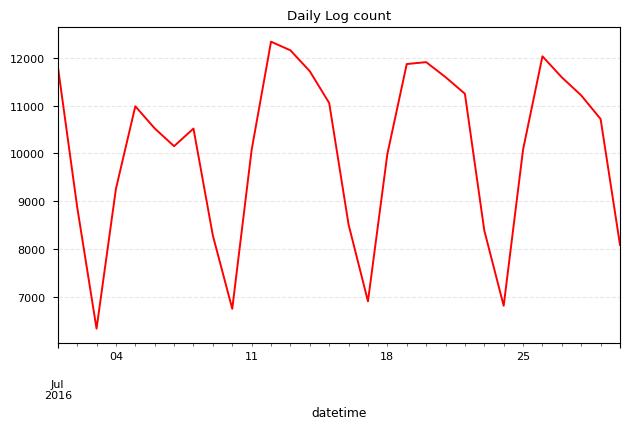

In [42]:
#daily log size 
df.groupby('datetime').size().plot(c ='r') #color = red

plt.title('Daily Log count')
plt.grid(color ='lightgray', alpha = 0.5, linestyle = '--')
plt.tight_layout()

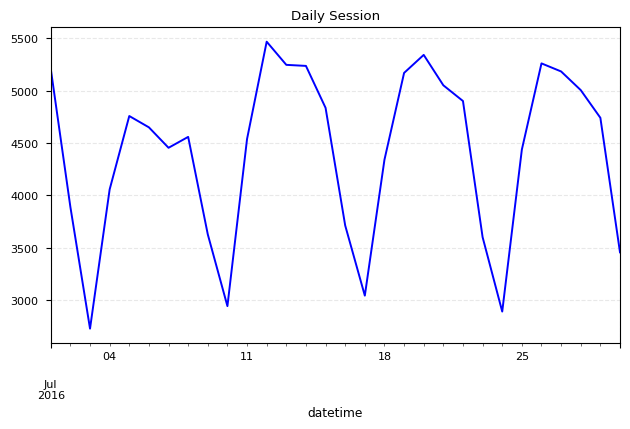

In [43]:
# 일별 사용자 수-> activness index
df.groupby('datetime')['sessionid'].nunique().plot(c='b') #일별 사용자 수 
plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Note. 
- 앱 사용에 seasonality(계절성) 존재
- 로그수와 세션수의 트렌드가 유사

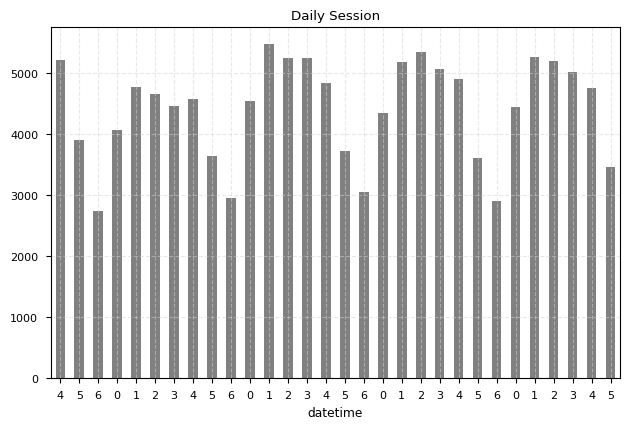

In [44]:
## 요일별 사용자 수 -> weekforday
# 0:Monday, 6:Sunday

s = df.groupby('datetime')['sessionid'].nunique()
s.index = s.index.weekday #또는 dayofweek

s.plot(color='grey', kind = 'bar', rot =0)
plt.title('Daily Session')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Note. 
- 주말에 사용성이 매우 감소하고 주중 초반이 높은편
- 문서앱이라는 특성상, 직장인 혹은 학생이 주로 사용할 것으로 가정한다면 가정과 일치하는 결과

2. 탐색 내용
- 일별, 확장자별 로그수
- 일별, 위치별 로그수
- 일별, 액션별 로그수
- 일별, 화면 스크린별 유니크 유저수

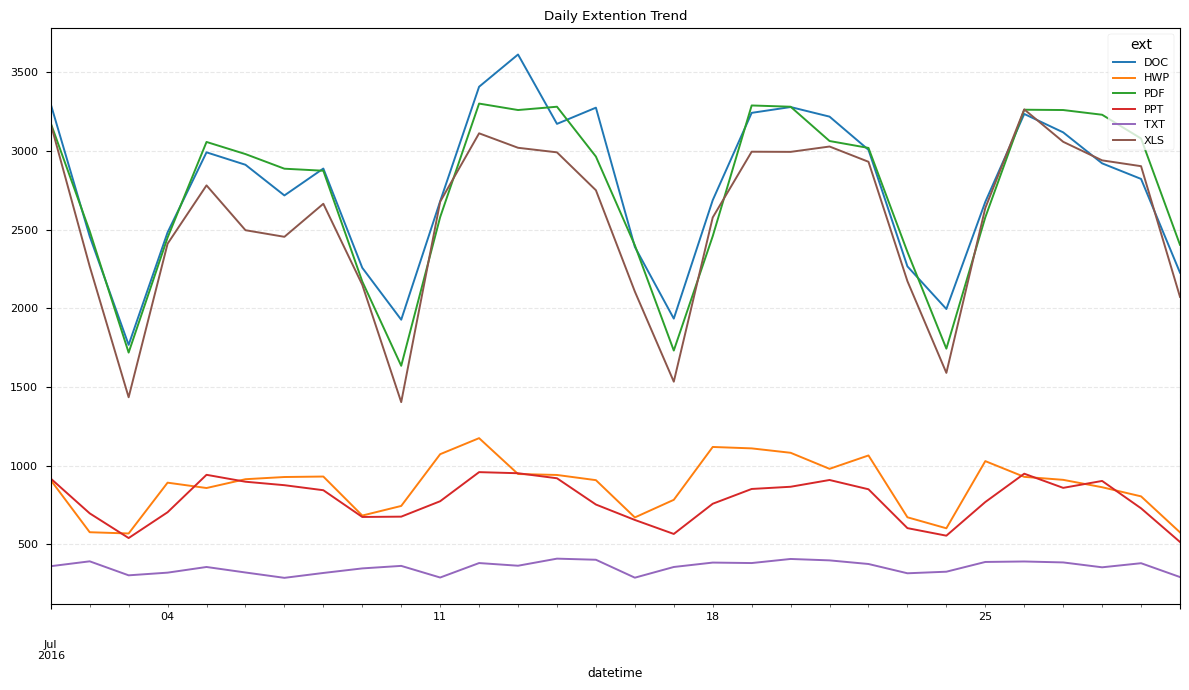

In [45]:
#일별, 확장자별 로그수
df.groupby(['datetime','ext']).size().unstack().dropna(axis=1).plot(figsize=(12,7))

plt.title("Daily Extention Trend")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()


<Axes: xlabel='datetime'>

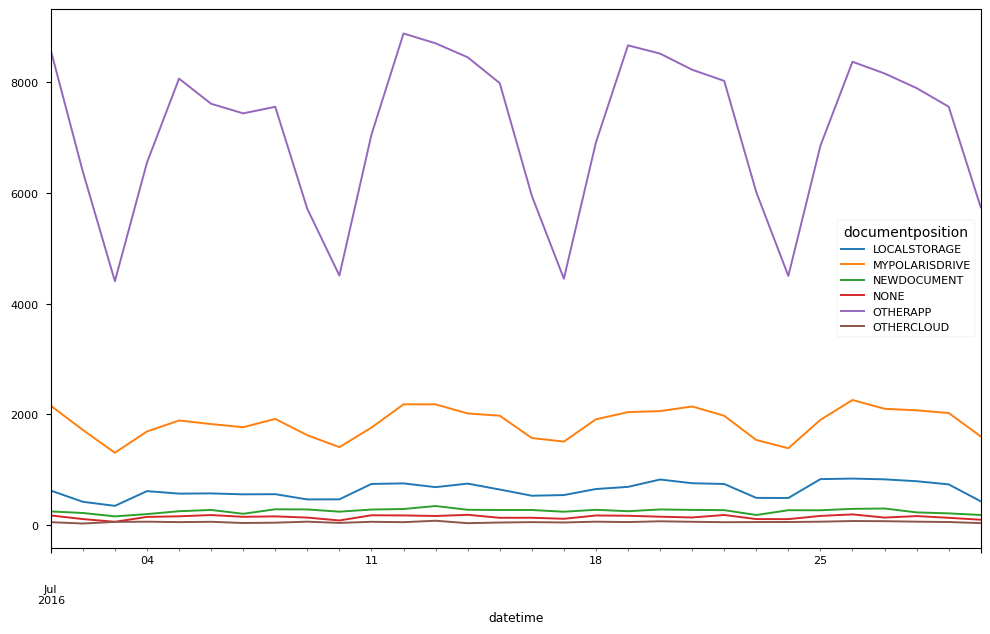

In [46]:
#일별,위치별 로그 수
df.groupby(['datetime','documentposition']).size().unstack().dropna(axis=1).plot(figsize=(12,7))

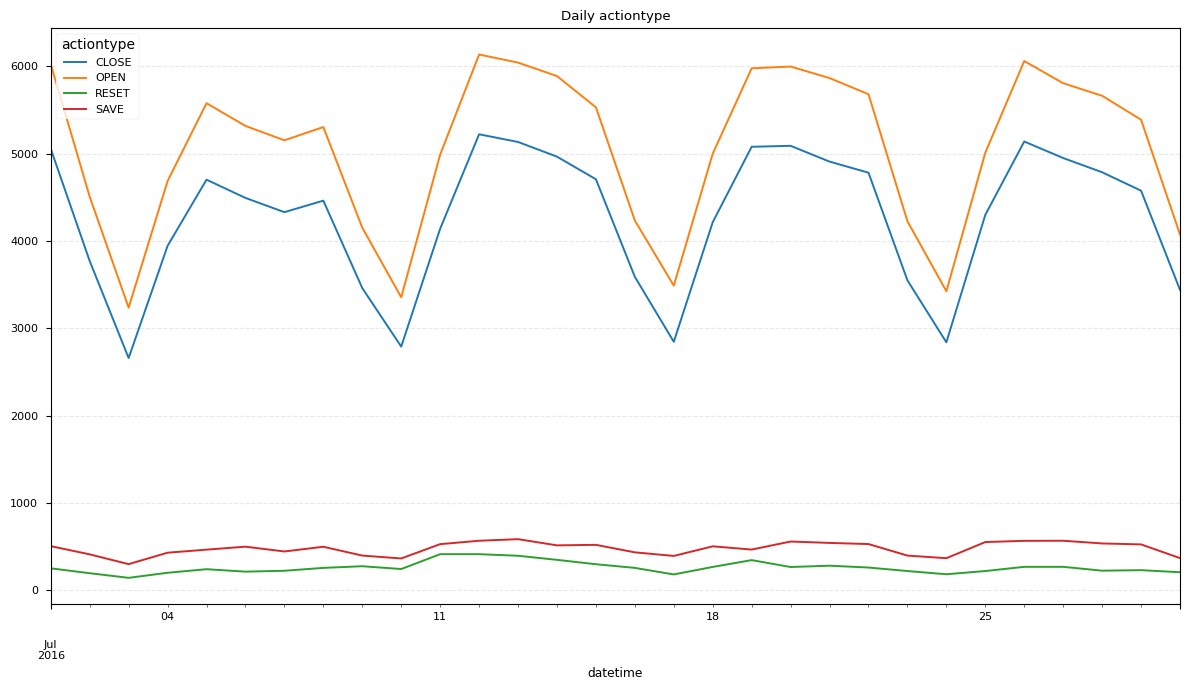

In [47]:
#일별, 행동별 로그 수
df.groupby(["datetime", "actiontype"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily actiontype")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

- 일별, 화면 스크린별 유니크한 사용자 수 - 히트맵

In [48]:
#일별, 화면 스크린별 유니크한 사용자 수
screens = df.groupby(['datetime','screen'])['sessionid'].nunique().unstack().fillna(0).astype(int)

#cols order change - 사용자 수의 평균이 높은 스크린순으로 index 정렬
desc_idx = screens.mean().sort_values(ascending=False).index 
screens= screens[desc_idx]

<Axes: xlabel='screen', ylabel='datetime'>

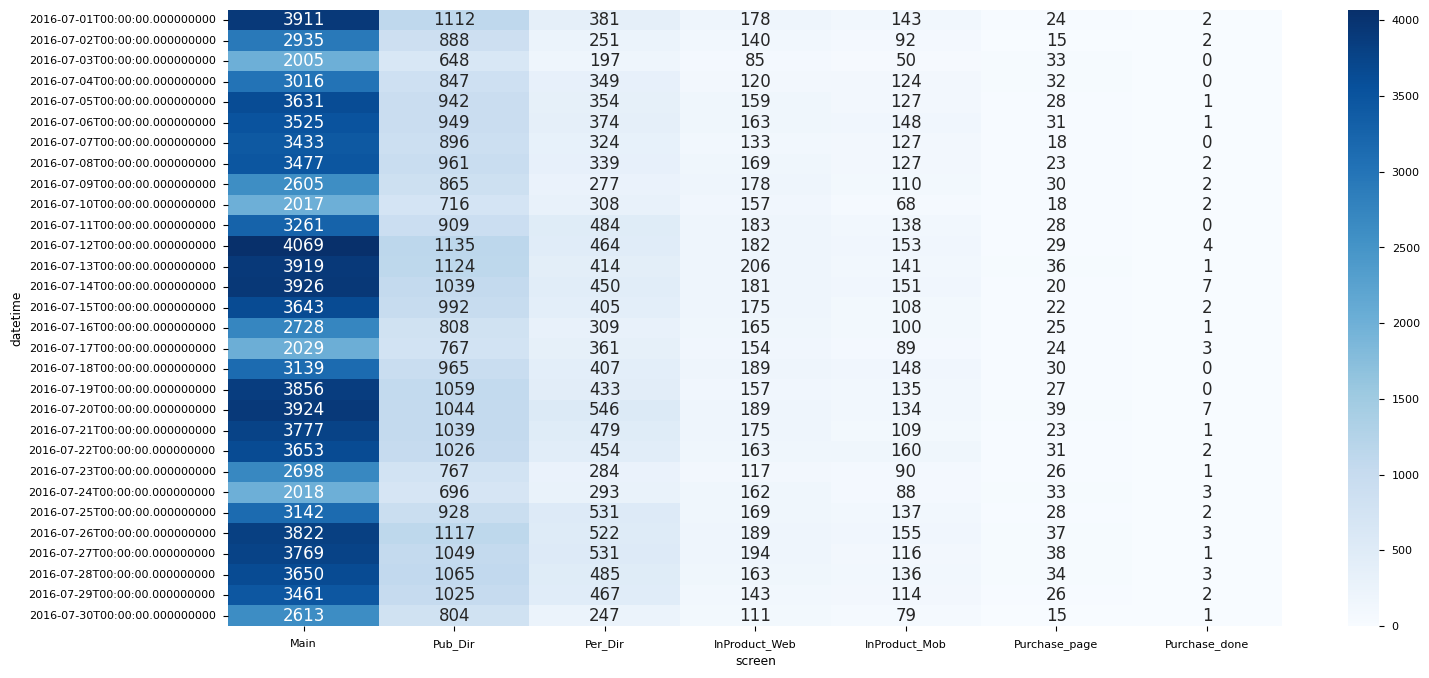

In [49]:
#heatmap - funnel model
plt.subplots(figsize = (17,8))

sns.heatmap(screens, annot =True, fmt = 'd', annot_kws={'size':12},cmap='Blues')


### Note.
- doc, pdf, xls 순으로 주로 사용
- 주요 문서 이용 위치는 otherapp 
- Main -> 구매완료(purchase_done) 까지 과정에서 대부분 이탈

### 3.2 Pivoting 을 통한 변수별 특성 탐색
- unstack, stack, pivot_table 과 같은 pandas 함수를 이용해, 다양한 각도에서 데이터 탐색

In [50]:
def pivot_heat(c1,c2,cmap,val='sessionid'):
    pivot = df.groupby([c1,c2])[val].nunique().unstack().fillna(0).astype(int)
    
    #heatmap
    plt.subplots(figsize=(12,7))
    sns.heatmap(pivot,annot=True, fmt='d', cmap=cmap)
    plt.title(f'Users {c1} by {c2}')

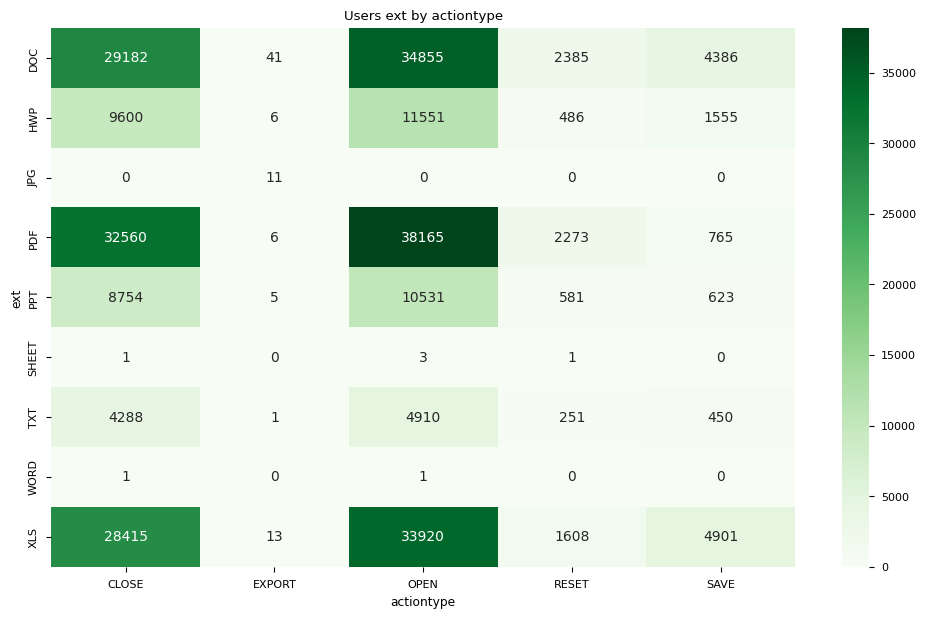

In [51]:
# 확장자 및 행동 타입별 이용 현황
pivot_heat('ext','actiontype','Greens')

In [52]:
#count to percent
ext_action = df.groupby(['ext','actiontype'])['sessionid'].nunique().unstack().fillna(0).astype(int)
ext_action.apply(lambda x : x/x.sum()*100).round(2)

actiontype,CLOSE,EXPORT,OPEN,RESET,SAVE
ext,,,,,
DOC,25.87,49.40,26.02,31.44,34.59
HWP,8.51,7.23,8.62,6.41,12.26
JPG,0.00,13.25,0.00,0.00,0.00
PDF,28.86,7.23,28.49,29.97,6.03
PPT,7.76,6.02,7.86,7.66,4.91
SHEET,0.00,0.00,0.00,0.01,0.00
TXT,3.80,1.20,3.67,3.31,3.55
WORD,0.00,0.00,0.00,0.00,0.00
XLS,25.19,15.66,25.33,21.20,38.65


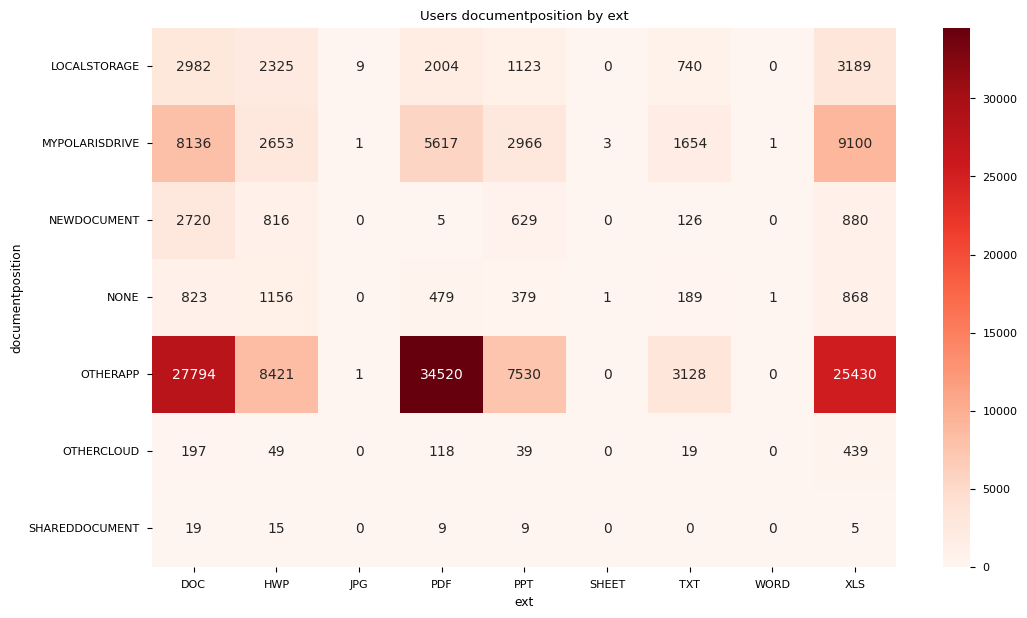

In [53]:
#위치 및 확장자별 이용 현황
pivot_heat('documentposition','ext','Reds')

### 3.3 변수별 분포 및 상관관계

In [54]:
df.head(10)

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main
5,RESET,View,PDF,sess1,OTHERAPP,2016-07-06,Main
6,CLOSE,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main
7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main
8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main
9,CLOSE,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main


In [55]:
#OPEN한 유저의 확장자별 이용 현황
ext_by_session  = df.loc[df['actiontype']=='OPEN'].groupby(['sessionid','ext']).size().unstack().dropna(how='all')
ext_by_session

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
sess1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
sess10,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
sess100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
sess1000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
sess99995,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sess99996,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
sess99997,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#OPEN한 유저의 위치별 이용 현황
pos_by_session  = df.loc[df['actiontype']=='OPEN'].groupby(['sessionid','documentposition']).size().unstack().dropna(how='all')
pos_by_session

documentposition,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,
sess0,1.0,1.0,NaN,NaN,NaN,NaN
sess1,NaN,NaN,NaN,1.0,NaN,NaN
sess10,NaN,1.0,NaN,1.0,NaN,NaN
sess100,NaN,NaN,NaN,1.0,NaN,NaN
sess1000,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...
sess99995,NaN,NaN,NaN,1.0,NaN,NaN
sess99996,NaN,1.0,NaN,2.0,NaN,NaN
sess99997,NaN,NaN,NaN,1.0,NaN,NaN


In [57]:
# Join => sessionid becomes unique (primary key)
ext_pos = pd.concat([ext_by_session,pos_by_session],axis=1).fillna(0)
ext_pos.head()

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
ext_pos.describe().round(2)

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
count,120657.00,120657.00,120657.00,120657.00,120657.0,120657.00,120657.0,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00
mean,0.34,0.11,0.35,0.10,0.0,0.04,0.0,0.31,0.07,0.21,0.04,0.93,0.01,0.00
std,0.59,0.35,0.55,0.35,0.0,0.21,0.0,0.54,0.27,0.47,0.20,0.69,0.08,0.02
min,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,0.00,1.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.00,1.00,0.00,0.00
max,6.00,6.00,4.00,5.00,1.0,4.00,1.0,7.00,5.00,7.00,4.00,9.00,4.00,2.00


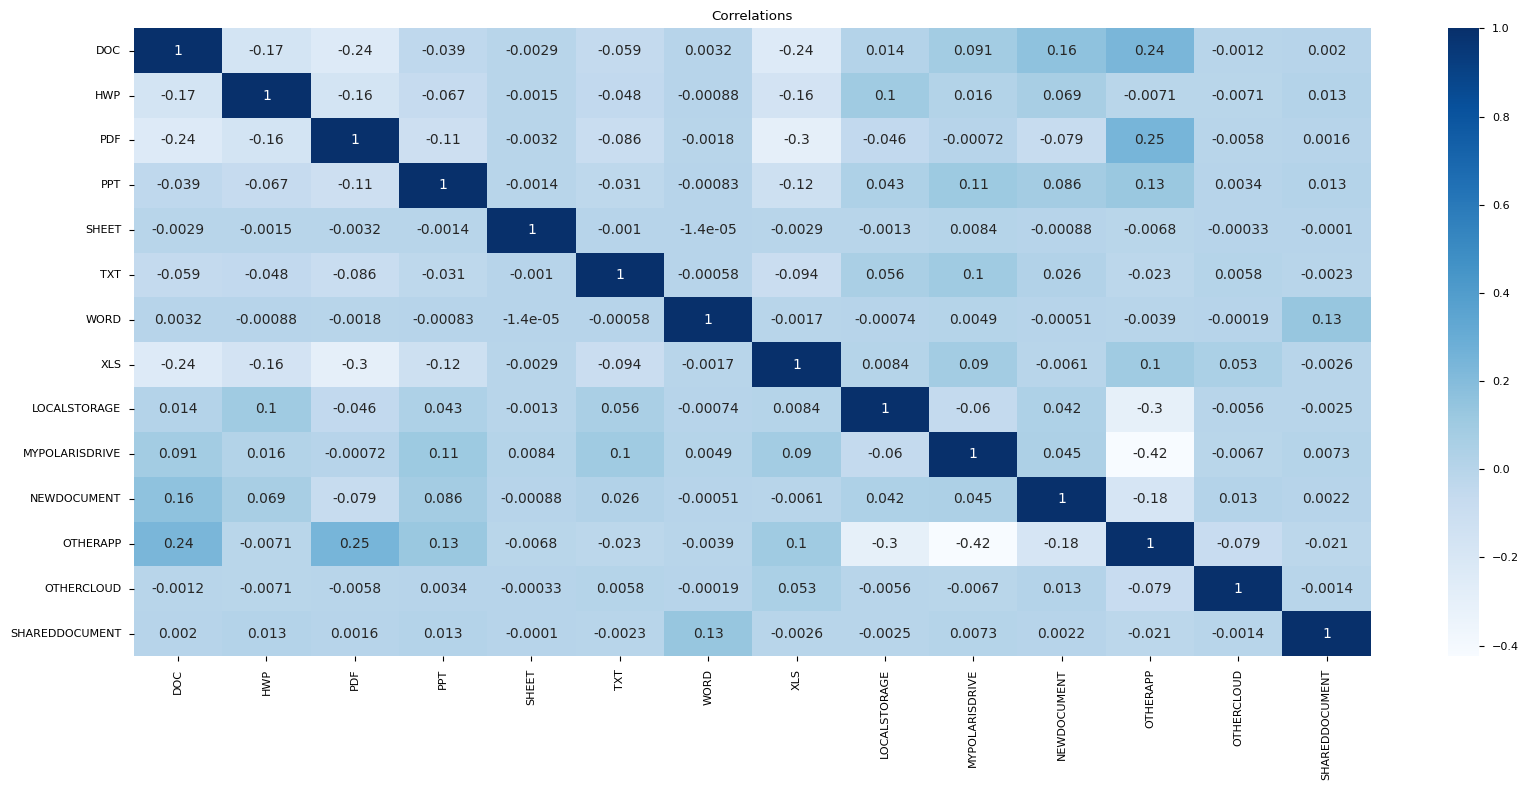

In [59]:
#확장자 및 위치 변수의 상관관계
plt.subplots(figsize=(17,8))
sns.heatmap(ext_pos.corr(), annot=True,cmap='Blues')
plt.title('Correlations')
plt.tight_layout()

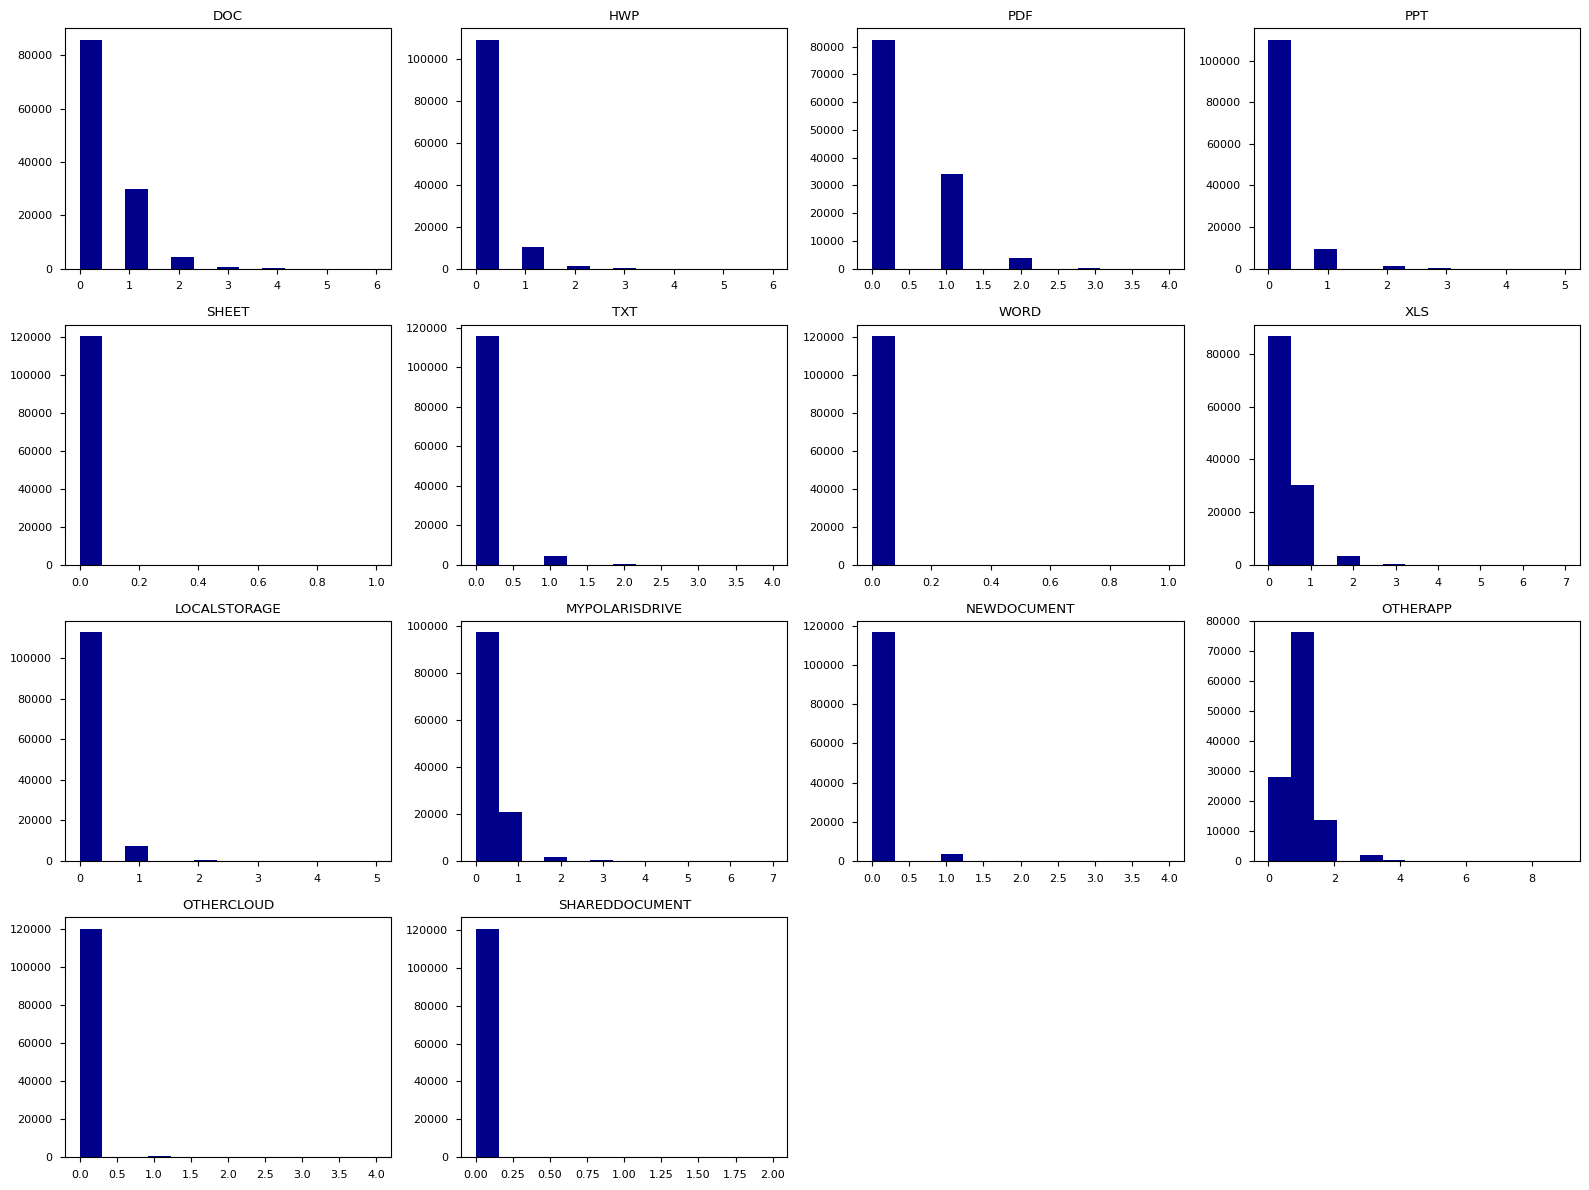

In [60]:
#histogram 
ext_pos.hist(bins=13,color ='darkblue' ,figsize=(16,12),grid=False)
plt.grid(color='lightgrey',alpha=0.5, linestyle='--')
plt.tight_layout()

### 3.4 구간별 전환율 (Funnel) Daily Trend

In [61]:
#daily session count by screen
screens.head(10)

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3911,1112,381,178,143,24,2
2016-07-02,2935,888,251,140,92,15,2
2016-07-03,2005,648,197,85,50,33,0
2016-07-04,3016,847,349,120,124,32,0
2016-07-05,3631,942,354,159,127,28,1
2016-07-06,3525,949,374,163,148,31,1
2016-07-07,3433,896,324,133,127,18,0
2016-07-08,3477,961,339,169,127,23,2
2016-07-09,2605,865,277,178,110,30,2


In [62]:
#mean of each columns - 구간별 전환수 
conver_cnt = screens.mean().astype(int)
conver_cnt

screen
Main             3255
Pub_Dir           939
Per_Dir           390
InProduct_Web     161
InProduct_Mob     119
Purchase_page      27
Purchase_done       1
dtype: int32

In [63]:
#average conversion rate - 구간별 전환율 
conver_rt = [(conver_cnt[i+1]/ conver_cnt[i] *100).round(2) for i in range(len(conver_cnt)-1)]
conver_rt

[28.85, 41.53, 41.28, 73.91, 22.69, 3.7]

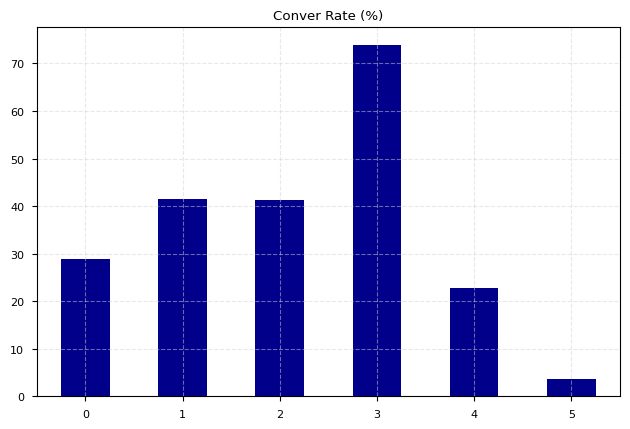

In [64]:
#전환율 막대그래프
pd.Series(conver_rt).plot(kind='bar',color='darkblue',rot=0)

plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [65]:
type(conver_cnt.index[0])

str

In [66]:
#x label - fun_label
fun_label = [conver_cnt.index[i] + '>' + conver_cnt.index[i+1] for i in range(len(conver_cnt)-1)]
fun_label

['Main>Pub_Dir',
 'Pub_Dir>Per_Dir',
 'Per_Dir>InProduct_Web',
 'InProduct_Web>InProduct_Mob',
 'InProduct_Mob>Purchase_page',
 'Purchase_page>Purchase_done']

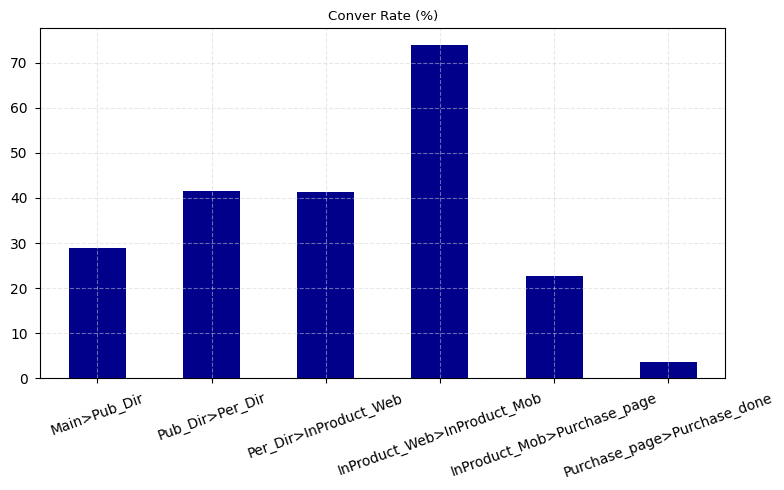

In [67]:
pd.Series(conver_rt, index = fun_label).plot(kind='bar', color = 'darkblue', rot=20, figsize=(8,5), fontsize=10)
plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

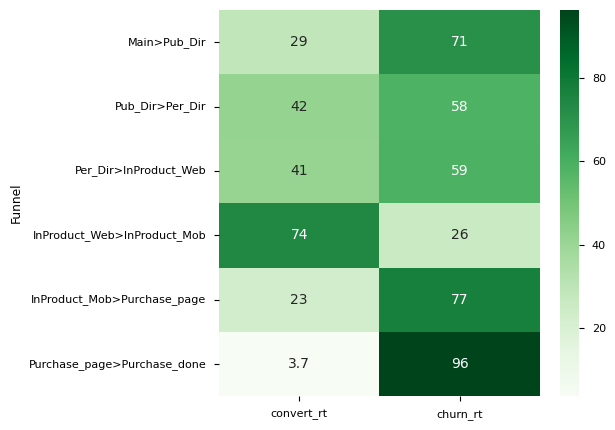

In [68]:
#전환율과 이탈율 비교 - heatmap
conv_rt_tb = pd.Series(conver_rt, index=fun_label).to_frame()
conv_rt_tb.index.name = 'Funnel'
conv_rt_tb.columns = ['convert_rt']
conv_rt_tb['churn_rt'] = 100 - conv_rt_tb['convert_rt']

sns.heatmap(conv_rt_tb, annot=True, cmap='Greens')
plt.tight_layout()

### 3.5 중간정리
- 일별 주요 통계
    - 주말에 활동화 세션이 감소하고 주중 초반에 증가하는 추세(trend)를 보인다
    - 확장자별로 PDF, DOC,XLS가 1 tier, HWP,PPT가 2 tier에 속한다.
    - 문서의 이용 위치는 otherapp이 압도적으로 높다.
- 구간별 전환율
    - 전환율이 가장 낮은 구간(=이탈이 가장 높은 구간)은 구매창에서 구매완료 창으로 전환하는 구간이다(전환율 3.7%)
    - 제품내 웹-> 앱으로 전환하는 구간은 전환율이 양호하다.(전환율 74%)

## 4. 클러스터링 For Targeting
> 사용자의 세분화를 통해 분석의 정확도를 높인다

### 4.1 What is K-MEANS?
 1. Select number of clusters, K
 2. Select K points as the initial centroids
 3. Repeat
 4. Form K clusters by assigning all points to the closest centroid
 5. Recompute the centroid of each cluster
 6. Until The centroids don't change 
 
- Reference link: http://rfriend.tistory.com/228 
![imge](https://t1.daumcdn.net/cfile/tistory/2649913A57A572321D) 


In [69]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main


- 확장자만 기준으로 sessionid 클러스터링

In [70]:
# 클러스터링을 위한 전처리
# 만약, 다른 변수가 같이 있다면 scaling 필수

df_ext = df.loc[df['actiontype']=='OPEN'].groupby(['sessionid','ext']).size().unstack().fillna(0)
df_ext.head(10)

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess10000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess100001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sess100002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_ext_elbow = df_ext.copy()

In [72]:
#!pip install scikit-learn

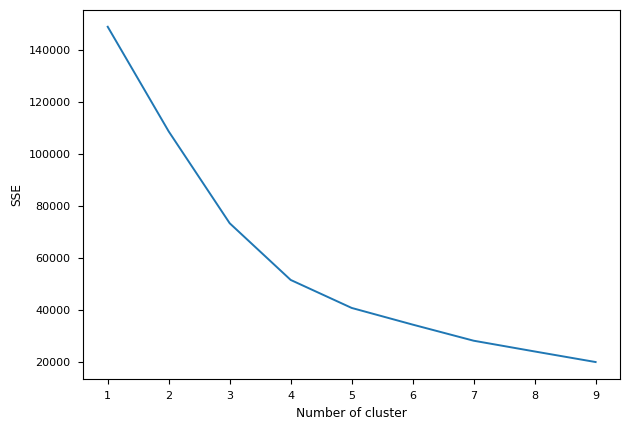

In [73]:
#scree plot(PCA) with sum of square error(MSE)
from sklearn.cluster import KMeans
sse = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k , max_iter = 1000).fit(df_ext_elbow) #max_iter : 최대 반복횟수
    df_ext_elbow['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.tight_layout()
plt.show()

#### Note.
Silhouette Coefficient Method(실루엣 계수)
> http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

- 클러스터링 평가 지표
> 군집 내 비유사성('within' dissimilarities)은 작고, 군집 간 비유사성('between' dissimilarities)은 커야 생성된 클러스터의 품질이 좋다.

4개의 문서 그룹으로 사용자 클러스터링

In [74]:
km = KMeans(n_clusters=4).fit(df_ext)

In [75]:
labels = km.labels_
df_ext['group'] = labels

In [76]:
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [77]:
df_ext.group.value_counts()

group
1    34112
0    33560
2    31419
3    21566
Name: count, dtype: int64

In [78]:
df_ext_mean = df_ext.groupby('group').mean().round(2)
df_ext_mean

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
group,,,,,,,,
0,0.01,0.01,1.13,0.03,0.0,0.01,0.0,0.01
1,1.18,0.00,0.09,0.06,0.0,0.02,0.0,0.07
2,0.01,0.01,0.05,0.02,0.0,0.01,0.0,1.13
3,0.00,0.57,0.01,0.39,0.0,0.19,0.0,0.00


<Axes: xlabel='group', ylabel='ext'>

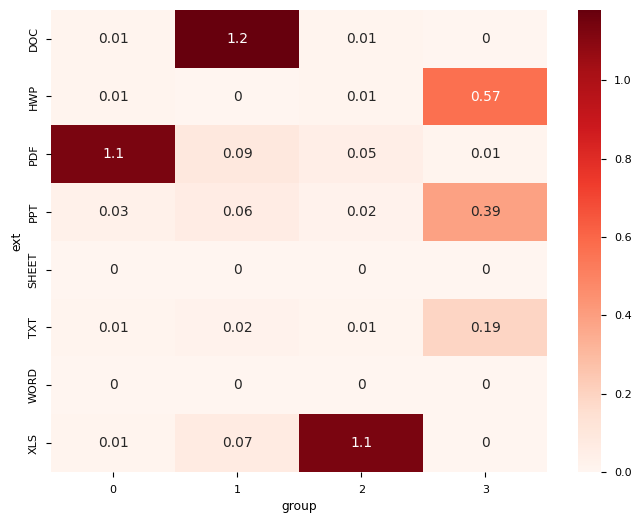

In [79]:
plt.subplots(figsize = (8,6))

sns.heatmap(df_ext_mean.T, annot=True,cmap='Reds')

####  Note. 

- Labeling 주의 (실행시마다 바뀜)

In [80]:
group_name = {0: 'gr_doc',
              1: 'gr_pdf',
              2: 'gr_xls',
              3: 'gr_hwp'}

In [81]:
df_ext['group'] = df_ext['group'].replace(group_name)
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,gr_doc
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_doc
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,gr_hwp
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gr_xls
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_doc


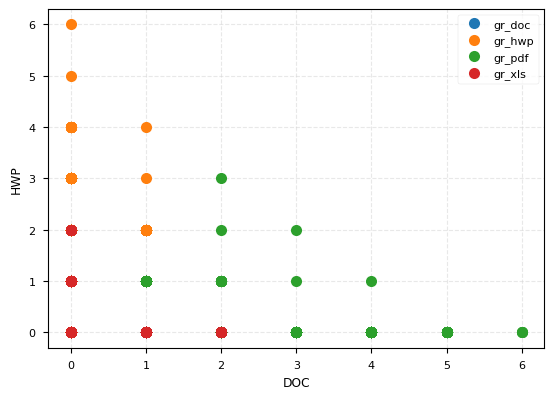

In [82]:
#실제 DOC, HWP 문서의 클러스터 확인
groups = df_ext.groupby('group')

fig, ax = plt.subplots()

for g_name , group in groups:
    ax.plot(group['DOC'], group['HWP'], marker='o',linestyle='',ms = 8, label=g_name)
    ax.legend()
    
plt.xlabel('DOC')
plt.ylabel('HWP')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

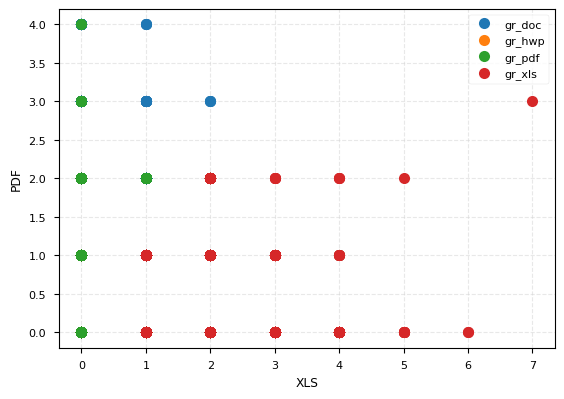

In [83]:
#실제 XLS, PDF 문서의 클러스터 확인
groups = df_ext.groupby('group')

fig, ax = plt.subplots()

for g_name , group in groups:
    ax.plot(group['XLS'], group['PDF'], marker='o',linestyle='',ms = 8, label=g_name)
    ax.legend()
    
plt.xlabel('XLS')
plt.ylabel('PDF')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

### 클러스터별 전환율

In [84]:
df_open = df.loc[df['actiontype']=='OPEN']
df_open.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main
7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main
8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main


In [85]:
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,gr_doc
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_doc
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,gr_hwp
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gr_xls
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_doc


In [86]:
df_ext.group.head()

sessionid
sess0       gr_doc
sess1       gr_doc
sess10      gr_hwp
sess100     gr_xls
sess1000    gr_doc
Name: group, dtype: object

In [87]:
df_cluster = df_open.merge(df_ext['group'], on='sessionid', how='left')
df_cluster.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,group
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,gr_doc
1,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,gr_doc
2,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,gr_doc
3,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,gr_doc
4,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,gr_doc


In [88]:
#define a function to get conversion rates
#그룹별 전환율 계산
def conv_rt_by_grp(gr):
    df_gr_screen = df_cluster[df_cluster['group'] == gr]

    df_gr_screen = pd.pivot_table(df_gr_screen,index = 'datetime',
                columns='screen',
                values='sessionid',
                aggfunc='nunique').fillna(0).astype('int')
    
    conver_cnt = df_gr_screen.mean().astype(int).sort_values(ascending=False)
    conver_rt = [conver_cnt[i+1] / (conver_cnt[i] *1.0) *100 for i in range(len(conver_cnt)-1)]
    fun_label = [conver_cnt.index[idx] +'>' + conver_cnt.index[idx+1] for idx, v in enumerate(conver_cnt.index) if idx < 5]
    conver_rt = pd.Series(conver_rt, index= fun_label).fillna(0)

    return conver_rt

In [89]:
conv_rt_pdf = conv_rt_by_grp('gr_pdf')
conv_rt_pdf

Main>Pub_Dir                   24.547511
Pub_Dir>InProduct_Web          34.562212
InProduct_Web>Per_Dir          88.000000
Per_Dir>Purchase_page           4.545455
Purchase_page>Purchase_done     0.000000
dtype: float64

In [90]:
conv_rt_doc = conv_rt_by_grp('gr_doc')
conv_rt_doc

Main>Pub_Dir                    15.076923
Pub_Dir>Per_Dir                 29.931973
Per_Dir>InProduct_Web            4.545455
InProduct_Web>Purchase_page    100.000000
Purchase_page>Purchase_done      0.000000
dtype: float64

In [91]:
conv_rt_xls = conv_rt_by_grp('gr_xls')
conv_rt_xls

Main>Pub_Dir                   33.557047
Pub_Dir>Per_Dir                27.200000
Per_Dir>InProduct_Web          30.882353
InProduct_Web>Purchase_page    52.380952
Purchase_page>Purchase_done     0.000000
dtype: float64

In [92]:
conv_rt_hwp = conv_rt_by_grp('gr_hwp')
conv_rt_hwp      

Main>Pub_Dir                   31.958763
Pub_Dir>Per_Dir                55.483871
Per_Dir>InProduct_Web          37.209302
InProduct_Web>Purchase_page     6.250000
Purchase_page>Purchase_done     0.000000
dtype: float64

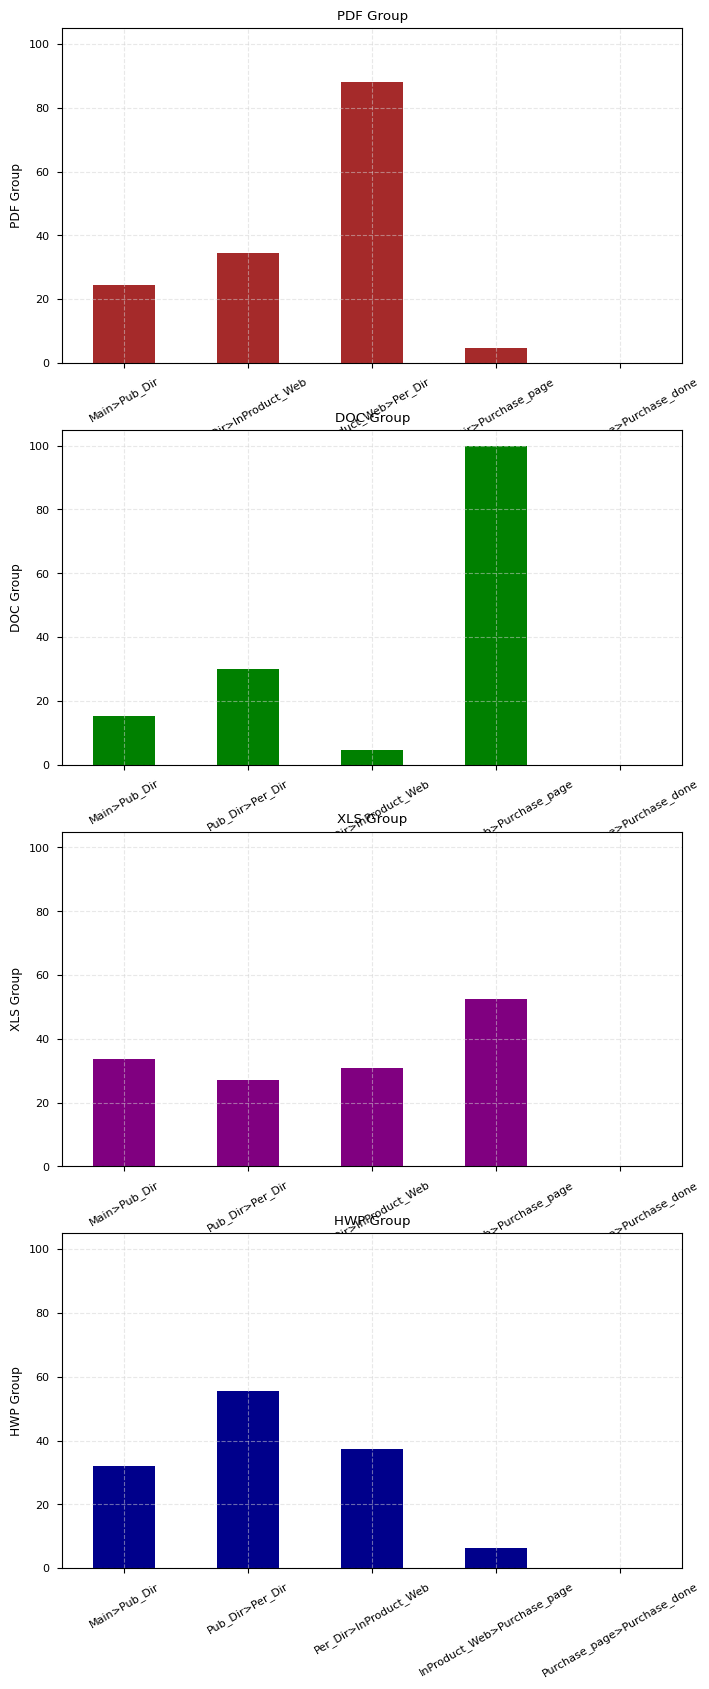

In [93]:
fig, ax = plt.subplots(4,1, figsize = (8,20), sharey = True) #sharey : y축 범위 통일

def plot_conv_rt(df,ext,i,color):
    df.plot(kind='bar',ax = ax[i], color=color, rot=30)
    ax[i].set_title(f'{ext} Group')
    ax[i].set_ylabel(f'{ext} Group')
    ax[i].grid(color='lightgrey', alpha=0.5, linestyle='--')

plot_conv_rt(conv_rt_pdf, 'PDF', 0,'brown')
plot_conv_rt(conv_rt_doc, 'DOC', 1,'green')
plot_conv_rt(conv_rt_xls, 'XLS', 2,'purple')
plot_conv_rt(conv_rt_hwp, 'HWP', 3,'darkblue')

In [125]:
# 그룹별 평균 전환율과 가중 평균
gr_rt = [conv_rt_pdf,conv_rt_doc,conv_rt_xls,conv_rt_hwp]
name = ['pdf','doc','xls','hwp']

#가중치 임의 설정 
weights = [1,1.3,1.5,2,2.5]

#가중 평균
def weight_avg(gr):
    w_avg = (gr.values * weights).sum() / len(gr)
    return w_avg

conv_rt = []
weight_rt = []
for data in gr_rt:
    conv_rt.append(data.replace(0, np.nan).mean())
    weight_rt.append(weight_avg(data))

conv_rt = pd.Series(conv_rt,index=name)
weight_rt = pd.Series(weight_rt,index=name)

avg_df = pd.concat([conv_rt,weight_rt],axis =1)
avg_df.columns =['mean','wg_mean']
avg_df


,mean,wg_mean
pdf,37.913794,42.113859
doc,37.388588,52.161334
xls,36.005088,44.000496
hwp,32.725484,34.480350


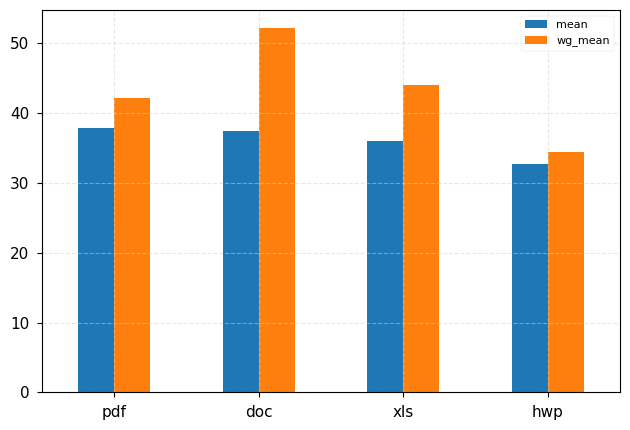

In [126]:
avg_df.plot(kind='bar',fontsize = 11, rot=0)

plt.grid(color='lightgrey',alpha = 0.5, linestyle ='--')
plt.tight_layout()

보고서 작성 하도록